$$ \LaTeX \text{ command declarations here.}
\newcommand{\N}{\mathcal{N}}
\newcommand{\R}{\mathbb{R}}
\renewcommand{\vec}[1]{\mathbf{#1}}
\newcommand{\norm}[1]{\|#1\|_2}
\newcommand{\d}{\mathop{}\!\mathrm{d}}
\newcommand{\qed}{\qquad \mathbf{Q.E.D.}}
\newcommand{\vx}{\mathbf{x}}
\newcommand{\vy}{\mathbf{y}}
\newcommand{\vt}{\mathbf{t}}
\newcommand{\vb}{\mathbf{b}}
\newcommand{\vw}{\mathbf{w}}
\newcommand{\vm}{\mathbf{m}}
\newcommand{\I}{\mathbb{I}}
\newcommand{\th}{\text{th}}
$$

# EECS 445:  Machine Learning
## Hands On 09: Support Vector Machines
* Instructor:  **Ben Bray, Chansoo Lee, Jia Deng, Jake Abernethy**
* Date:  October 10, 2016

### NEW: Finished Course website: http://eecs445-f16.github.io


## Brute Force Search for Max-Margin SVM Solution

In the hard-margin support vector machine formulation, we want to try to find the hyperplane the maximizes the margin and correctly classifies the data.

Let's generate some data!

Populating the interactive namespace from numpy and matplotlib


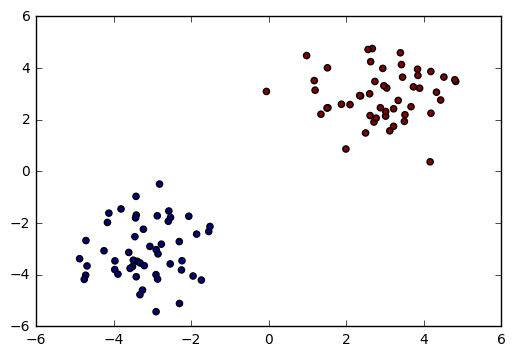

In [2]:
%pylab inline
import numpy as np

center1 = np.array([3.0,3.0])
center2 = np.array([-3.0,-3.0])
X = np.zeros((100,2)); Y = np.zeros((100,))
X[:50,:] = np.random.multivariate_normal(center1, np.eye(2),(50,))
Y[:50] = +1
X[50:,:] = np.random.multivariate_normal(center2, np.eye(2),(50,))
Y[50:] = -1

plt.scatter(X[:,0], X[:,1], c = Y)

## Problem: Hard-margin SVM

1. First pick one vector and offset term $(\vec{w}, b)$ that correctly classifies the data
1. Determine the size of the margin for this $\vec{w}$
1. **Challenging**: Do a brute force search (over a grid) to find the max-margin $\vec{w}$!
    > Note, this is not a good idea in general, since this algorithm has time complexity exponential in the dimension, but it's not so bad in 2d!
1. Find the support vectors and plot them
1. Modify the dataset above such that there is *no feasible solution $\vec{w}$* (but just barely)
1. How do you know when there is no feasible $\vec{w}$?

In [ ]:
wvec = np.array([-4.0,7.0])
bval = -2.4
# Does this wvec and b correctly classify data within margin?

## Problem: Soft-margin SVM objective

- Recall original OSMH problem is
    $$
    \begin{split}
    \underset{\vw, b, \xi}{\text{minimize}} \quad & \frac12 {\| \vw \|}^2 + \frac{C}{n} \sum \nolimits_{i = 1}^n \xi_i\\
    \text{subject to} \quad & y_i(\vw^T\vx_i + b) \geq 1 - \xi_i \quad \text{ and } \quad \xi_i \geq 0 \quad \forall i\\
    \end{split}
    $$
- Another way to write this is as follows:
    $$
    \begin{split}
    \underset{\vw, b, \xi}{\text{minimize}} \quad & \frac12 {\| \vw \|}^2 + \frac{C}{n} \sum \nolimits_{i = 1}^n \max(0,1 - y_i(\vw^T\vx_i + b))
    \end{split}
    $$



1. You modified the dataset above to ensure there is no feasible $\vec{w}$. Now find the $\vec{w}$ that minimizes the OMSH objective using a brute force search 
1. Find two values of $C$ where the support vectors of the solution are different. Plot these in both cases.

In [ ]:
# put some code in here!

### OSMH  *Dual* Formulation

- The previous objective function is referred to as the *Primal*
    - With $N$ datapoints in $d$ dimensions, the Primal optimizes over $d + 1$ variables ($\vw, b$).
- But the *Dual* of this optimization problem has $N$ variables, one $\alpha_i$ for each example $i$!

$$
    \begin{split}
    \underset{\alpha, \beta}{\text{maximize}} \quad &  -\frac12 \sum \nolimits_{i,j = 1}^n \alpha_i \alpha_j t_i t_j \vx_i^T \vx_j + \sum \nolimits_{i = 1}^n \alpha_i\\
    \text{subject to} \quad & 0 \leq \alpha_i \leq C/n \quad \forall i\ \\
    \quad & \sum \nolimits_{i=1}^n \alpha_i t_i = 0    
    \end{split}
$$

- Often the Dual problem is easier to solve.
- Once you solve the dual problem for $\alpha^*_1, \ldots, \alpha^*_N$, you get a primal solution as well!


1. Can you figure out a way (without using an optimization solver!) to determine the optimal dual parameters?
    - open ended, you can try different ideas
    - feel free to use the fact that you already know the support vectors
1. How do you know that you did indeed find the optimal $\alpha$'s?
1. How can you compute the primal variables $\vec{w}, b$ from these $\alpha$'s?

In [ ]:
# let's find some alphas!